In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the file containing the data
xtrain = pd.read_csv('xtrain.csv', header=None)
ytrain = pd.read_csv('ytrain.csv', header=None)
xtest = pd.read_csv('xtest.csv', header=None)
ytest = pd.read_csv('ytest.csv', header=None)

print("xtrain dimensions:", xtrain.shape)
print("ytrain dimensions:", ytrain.shape)
print("xtest dimensions:", xtest.shape)
print("ytest dimensions:", ytest.shape)

xtrain dimensions: (500, 25)
ytrain dimensions: (1, 500)
xtest dimensions: (500, 25)
ytest dimensions: (1, 500)


In [95]:
# Define a function to calculate w_star
def calculate_w_star(xtrain, ytrain, P):
    # Select the first P rows for X and the first P columns for Y
    X = xtrain.iloc[:P, :].to_numpy()
    y = ytrain.iloc[:, :P].to_numpy()

    # Calculate the estimate w∗ using the closed-form solution
    X_inv = np.linalg.inv(X.T @ X)
    w_star = X_inv @ X.T @ y.T

    return w_star

# Example usage:
P = 100
w_star = calculate_w_star(xtrain, ytrain, P)

print("w_star dimensions:", w_star.shape)
print("Estimated w∗:", w_star)

w_star dimensions: (25, 1)
Estimated w∗: [[-0.44835454]
 [ 0.24224867]
 [-0.3538698 ]
 [ 0.14095896]
 [-0.05112983]
 [ 0.32086854]
 [-0.21407909]
 [ 0.26642306]
 [-0.45927138]
 [ 0.16798302]
 [-0.0123946 ]
 [ 0.28956324]
 [-0.10525133]
 [ 0.25423014]
 [-0.20322417]
 [ 0.08298839]
 [-0.08608031]
 [ 0.16550706]
 [-0.07782973]
 [ 0.01767479]
 [ 0.21371049]
 [ 0.15207321]
 [ 0.31146435]
 [ 0.30668083]
 [ 0.00253066]]


In [98]:
# Define a function to compute Etrain
def calculate_Etrain(P, xtrain, ytrain, w_star):
    X = xtrain.iloc[:P, :].to_numpy()
    y = ytrain.iloc[:, :P].to_numpy().reshape(-1, 1)

    y_pred = X @ w_star
    squared_errors = (y_pred - y) ** 2
    mse_train = (1 / (2 * P)) * np.sum(squared_errors)

    return mse_train

# Define a function to compute Etest
def calculate_Etest(xtest, ytest, w_star):
    X_test = xtest.to_numpy()
    y_test = ytest.to_numpy().reshape(-1, 1)

    y_test_pred = X_test @ w_star
    squared_errors_test = (y_test_pred - y_test) ** 2
    mse_test = (1 / (2 * len(xtest))) * np.sum(squared_errors_test)

    return mse_test

# Example usage:
P = 100

w_star = calculate_w_star(xtrain, ytrain, P)
Etrain = calculate_Etrain(P, xtrain, ytrain, w_star)
Etest = calculate_Etest(xtest, ytest, w_star)

print("Etrain:", Etrain)
print("Etest:", Etest)


Etrain: 0.3491361204688298
Etest: 0.6638514230658924


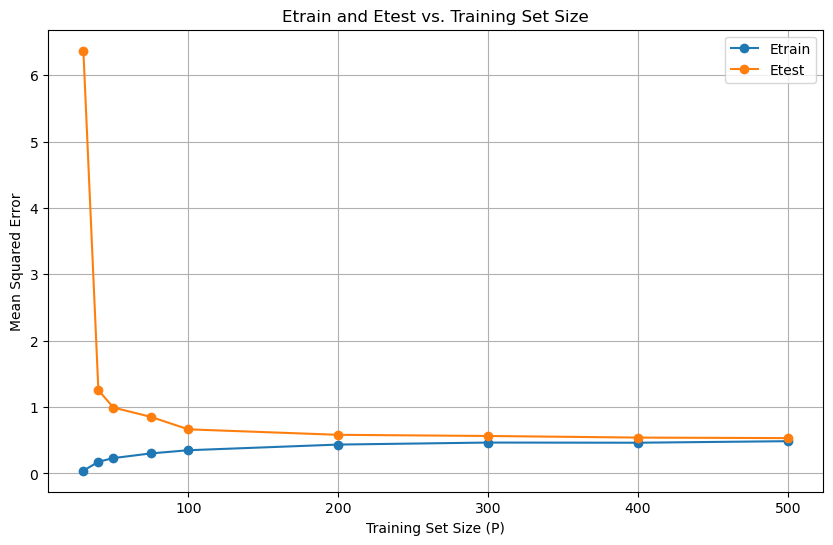

In [100]:
# List of training set sizes
training_set_sizes = [30, 40, 50, 75, 100, 200, 300, 400, 500]

# Lists to store Etrain and Etest values
Etrain_values = []
Etest_values = []

# Calculate Etrain and Etest for each training set size
for P in training_set_sizes:
    w_star = calculate_w_star(xtrain, ytrain, P)
    Etrain = calculate_Etrain(P, xtrain, ytrain, w_star)
    Etest = calculate_Etest(xtest, ytest, w_star)
    Etrain_values.append(Etrain)
    Etest_values.append(Etest)

# Plot Etrain and Etest
plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, Etrain_values, marker='o', label='Etrain')
plt.plot(training_set_sizes, Etest_values, marker='o', label='Etest')
plt.xlabel('Training Set Size (P)')
plt.ylabel('Mean Squared Error')
plt.title('Etrain and Etest vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.show()

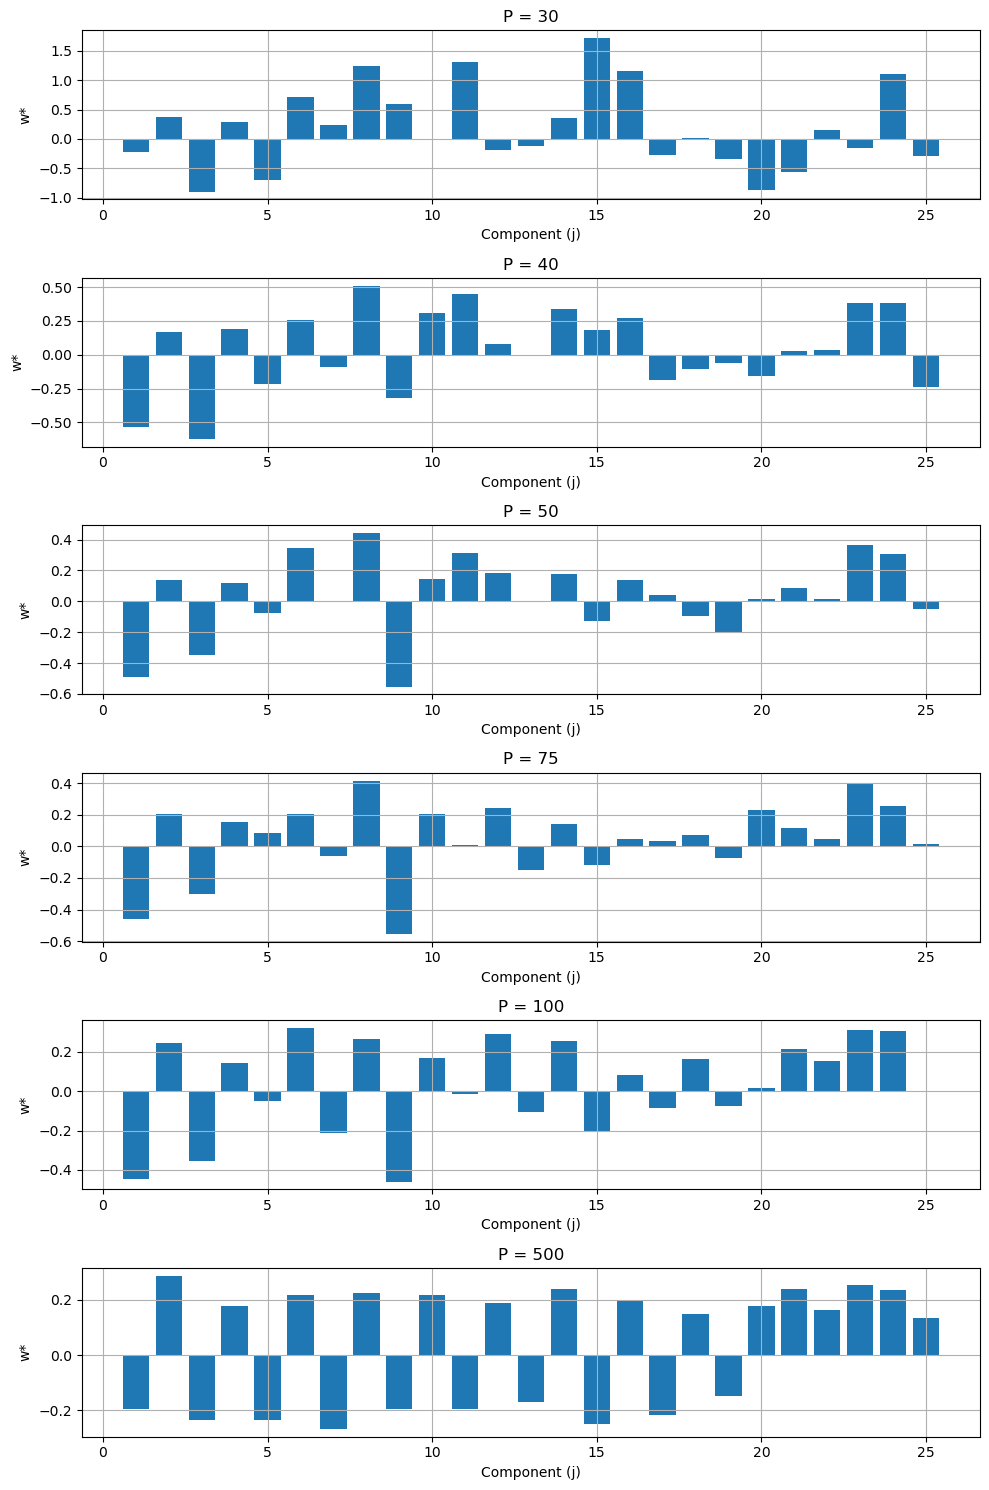

In [104]:
# List of training set sizes
training_set_sizes = [30, 40, 50, 75, 100, 500]  # Add or adjust sizes as needed

# Lists to store estimated w* vectors
w_star_vectors = []

# Calculate w* for each training set size
for P in training_set_sizes:
    w_star = calculate_w_star(xtrain, ytrain, P)
    w_star_vectors.append(w_star)

# True vector w (if available, replace with the actual values)
true_w = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

# Plot w* vectors as bar graphs
fig, ax = plt.subplots(len(training_set_sizes), figsize=(10, 15))
for i, P in enumerate(training_set_sizes):
    w_star_vector = w_star_vectors[i].reshape(-1)  # Convert to a 1D array
    ax[i].bar(range(1, 26), w_star_vector)
    ax[i].set_title(f'P = {P}')
    ax[i].set_xlabel('Component (j)')
    ax[i].set_ylabel('w*')
    ax[i].grid(True)

plt.tight_layout()
plt.show()